In [1]:
%matplotlib notebook
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py

In [4]:
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='vortex'
npix_pupil = 512

npix_detector = 256
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector
defocus = 4

In [5]:
highest_coeff = 15
rms_phase = 1e-9

M = highest_coeff-1
wfe_array = np.zeros((M,M+1))

for i in range(M):
    wfe_array[i,i+1] = rms_phase
print(wfe_array[:,:3])
    

[[0.e+00 1.e-09 0.e+00]
 [0.e+00 0.e+00 1.e-09]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]


In [6]:
data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus)

<IPython.core.display.Javascript object>


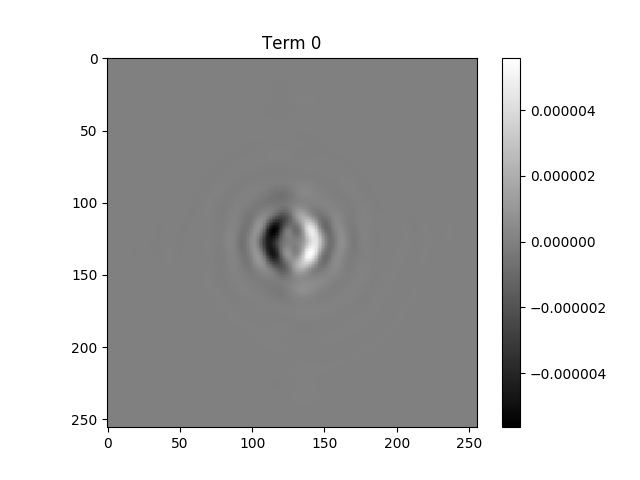

<IPython.core.display.Javascript object>


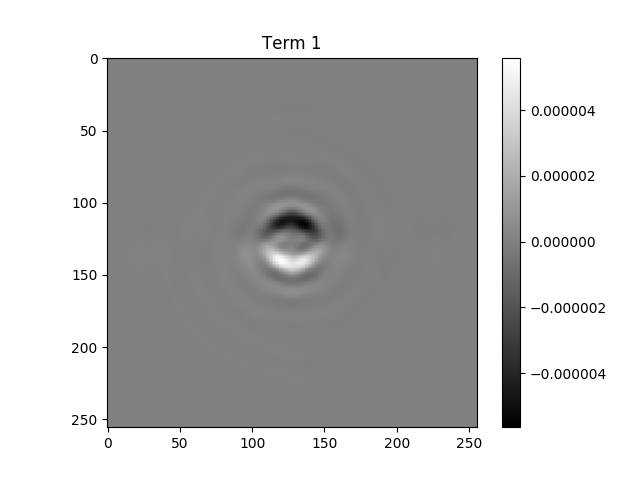

<IPython.core.display.Javascript object>


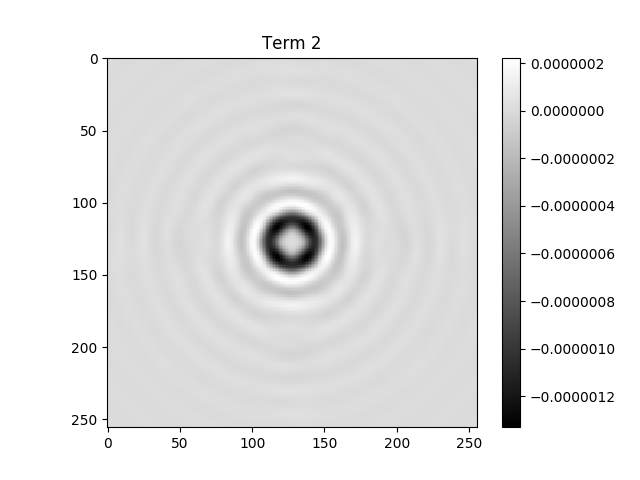

<IPython.core.display.Javascript object>


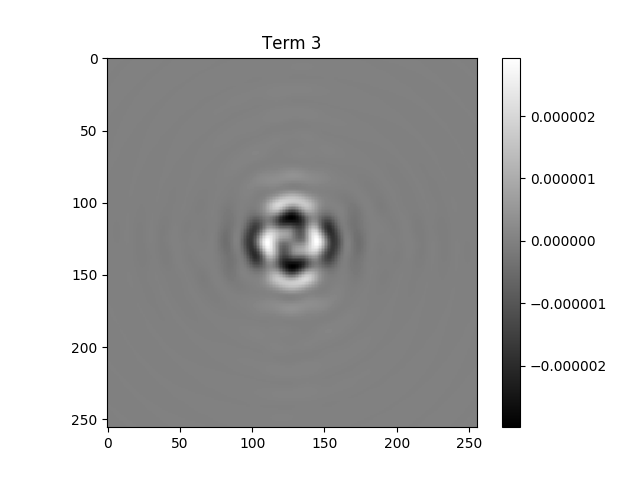

<IPython.core.display.Javascript object>


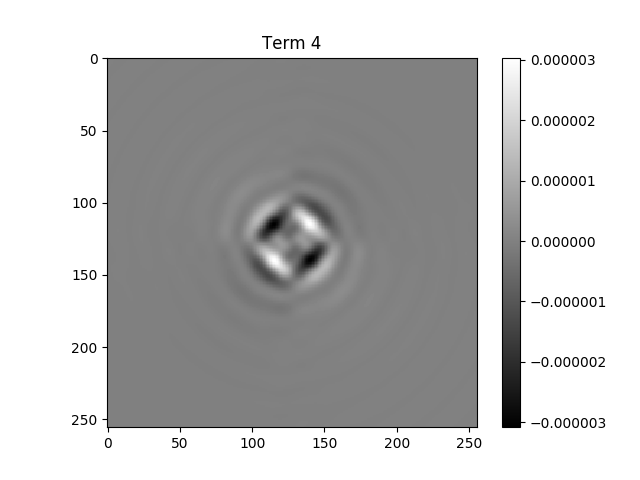

<IPython.core.display.Javascript object>


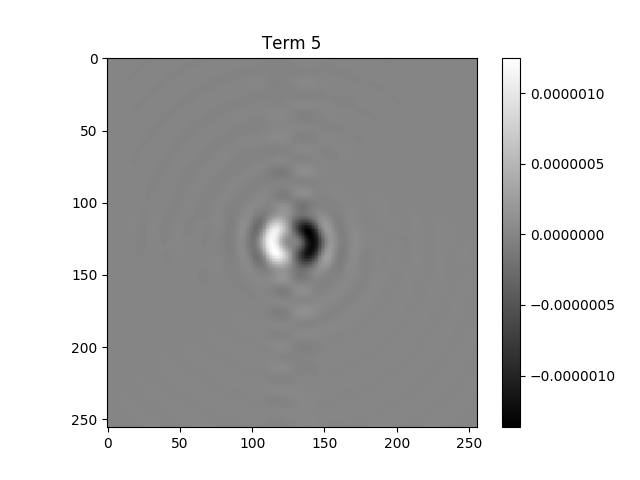

<IPython.core.display.Javascript object>


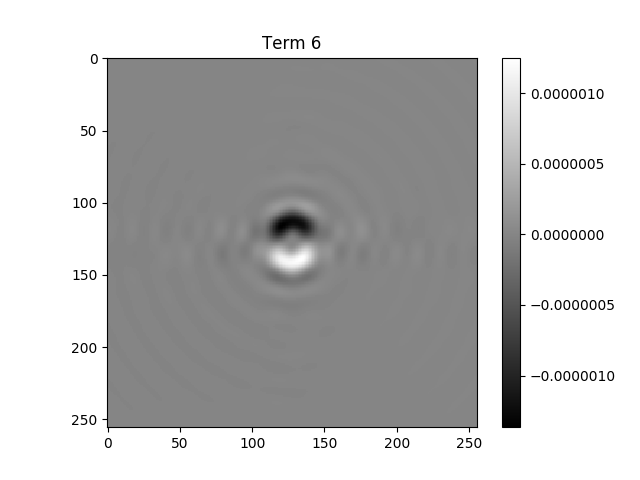

<IPython.core.display.Javascript object>


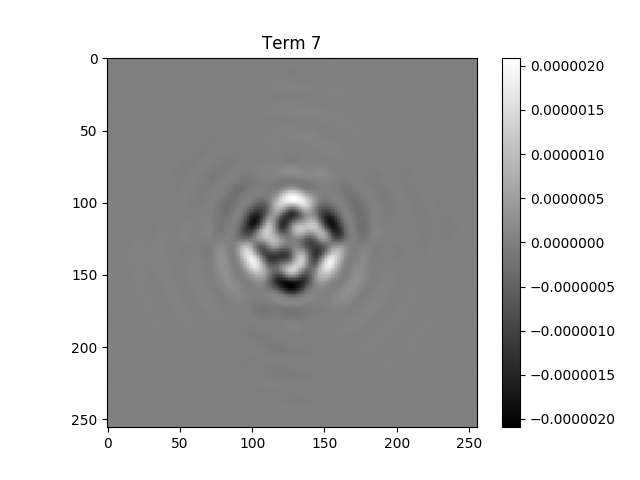

<IPython.core.display.Javascript object>


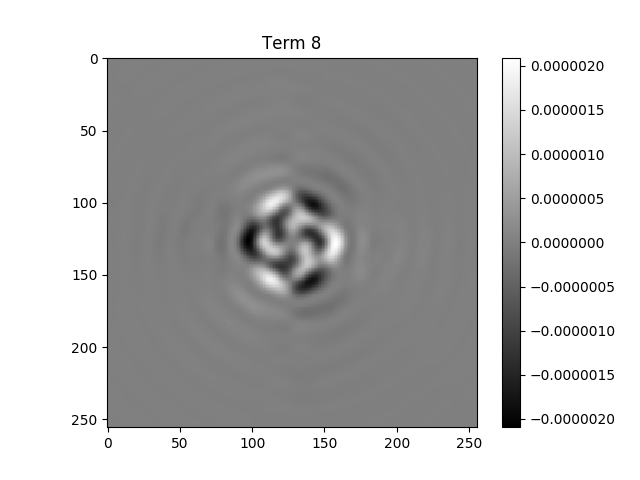

<IPython.core.display.Javascript object>


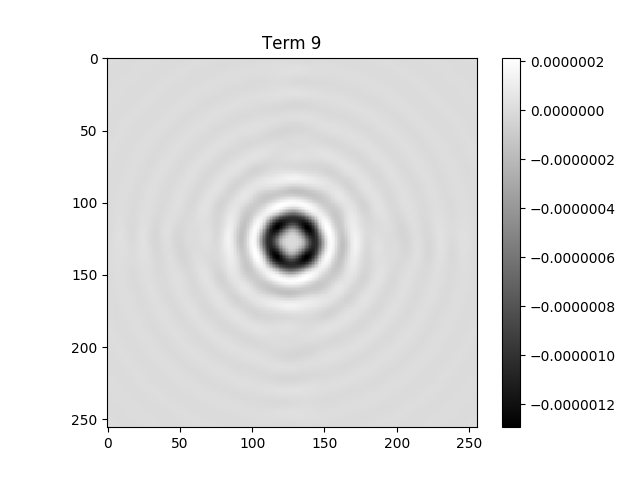

<IPython.core.display.Javascript object>


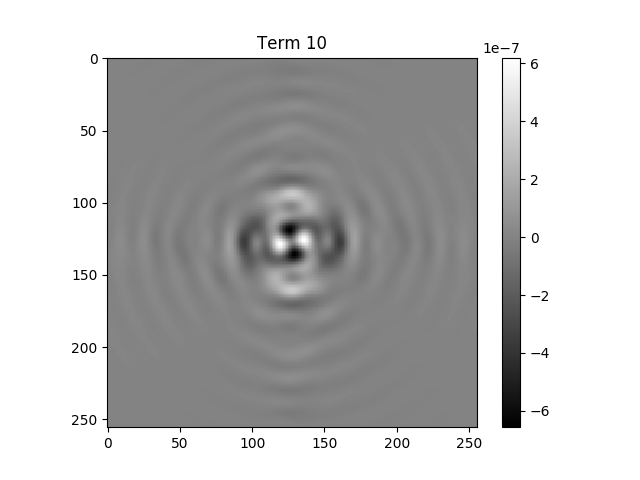

<IPython.core.display.Javascript object>


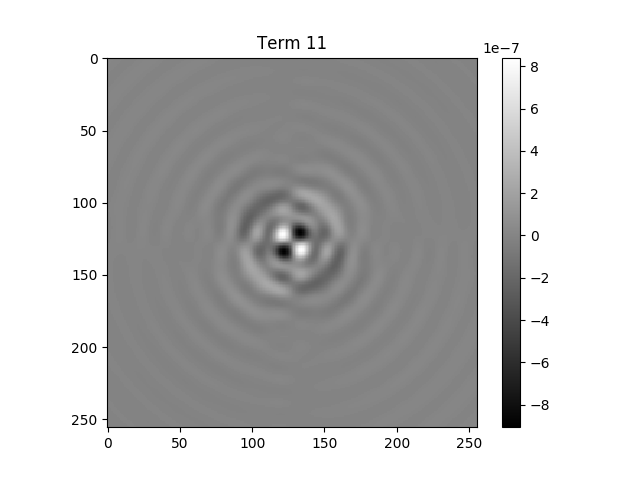

<IPython.core.display.Javascript object>


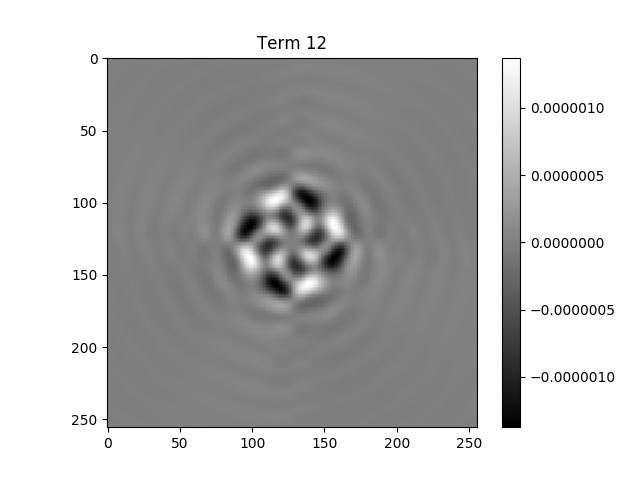

<IPython.core.display.Javascript object>


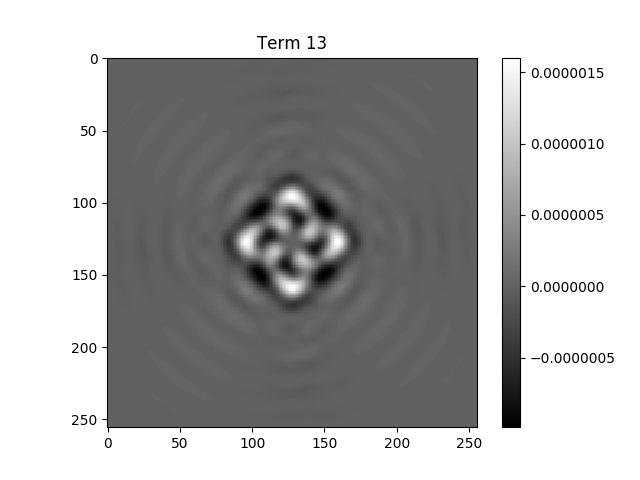

In [12]:
ref = data[:,:,0]
N = npix_detector
modes = np.zeros((N,N,M))
for i in range(M):
    modes[:,:,i] = data[:,:,i+1]-ref
    plt.figure()
    plt.imshow(modes[:,:,i],cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(i))
    

In [8]:
A = np.zeros((N**2,M))
for i in range(M):
    A[:,i] = np.reshape(modes[:,:,i],(-1,))

In [13]:
Apinv = np.linalg.pinv(A)
print(Apinv.shape)

(14, 65536)


In [14]:
testvec = modes[:,:,1].ravel()
print(testvec.shape)

(65536,)


In [15]:
np.dot(Apinv,testvec)

array([ 6.65618819e-16,  1.00000000e+00,  5.34728511e-16,  1.15535294e-17,
        1.25462520e-17,  2.48390718e-15,  1.50568577e-16, -6.51354784e-16,
        4.33811391e-16,  5.68121938e-17,  1.67414368e-16, -7.09027563e-16,
        8.77255083e-17,  1.11804961e-16])

In [16]:
file = 'vortex_50nm_256px_individual_zernikes_def_4_0.hdf5'
#file = 'fqpm_50nm_256px_individual_zernikes.hdf5'
with h5py.File(file, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 280)
(256, 256, 280)


In [17]:
print(coeffs[:,:3])

[[-5.00000000e-08 -4.47368421e-08 -3.94736842e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [18]:
K = 20
coeffs_sep = np.zeros((M,K,M))

In [19]:
for i in range(M):
    coeffs_sep[:,:,i] = coeffs[:,i*K:(i+1)*K]

In [20]:
coeffs_sep[:,:3,0]

array([[-5.00000000e-08, -4.47368421e-08, -3.94736842e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [21]:
rec_coeffs = np.zeros(coeffs_sep.shape)
for i in range(M):
    for j in range(K):
        vec = np.reshape(images[:,:,i*K+j]-ref,(-1,))
        rec_coeffs[:,j,i] = np.dot(Apinv,vec)

In [22]:
print(rec_coeffs[:,:3,0])

[[ -41.10694213  -38.07995359  -34.66987326]
 [  -2.29356137   -1.79224426   -1.35259363]
 [-102.45258725  -85.97428876  -69.83460606]
 [   7.67825138    6.38123522    5.13975922]
 [  -3.32181404   -2.7662328    -2.2320263 ]
 [   6.66535433    5.72690761    4.76105284]
 [   8.85942543    6.84917172    5.10624776]
 [   0.97523381    0.75660142    0.5662676 ]
 [   1.14457025    0.85867169    0.61678816]
 [ 147.57424085  122.66185107   98.8226948 ]
 [   9.58672108    7.98258037    6.43969186]
 [  -9.15735903   -7.67457457   -6.22701293]
 [  -3.44963738   -2.83927299   -2.26793201]
 [  -7.02725803   -5.75027783   -4.56905973]]


<IPython.core.display.Javascript object>


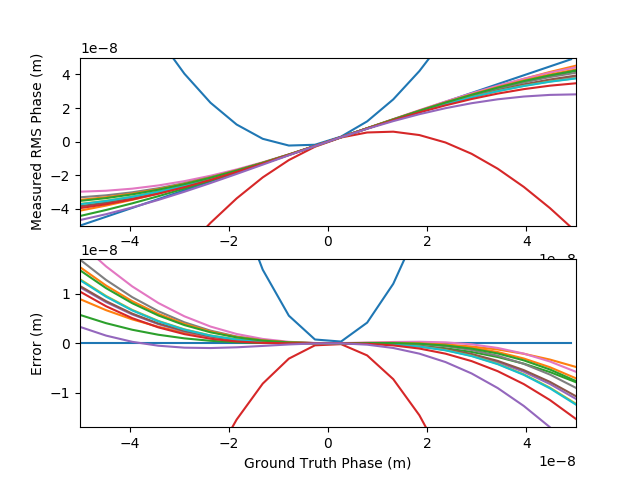

In [23]:
fig,ax = plt.subplots(2,1)
line1 = np.arange(-5e-8,5e-8,1e-9)
line0 = np.zeros(line1.shape)
ax[0].plot(line1,line1)
ax[1].plot(line1,line0)
for i in range(M):
#for i in [2,1,]:
    ax[0].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase)
    #ax[0].axis('equal')
    ax[0].set_xlim([-50e-9,50e-9])
    ax[0].set_ylim([-50e-9,50e-9])
    ax[0].set_ylabel('Measured RMS Phase (m)')
    #ax[0].legend(['None','1','2','3','4','5','6'])
    ax[1].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase-coeffs_sep[i,:,i])
    ax[1].axis('equal')
    ax[1].set_xlim([-50e-9,50e-9])
    ax[1].set_ylim([-5e-9,5e-9])
    ax[1].set_ylabel('Error (m)')
    ax[1].set_xlabel('Ground Truth Phase (m)')